### Student Information
Name: 吳余山

Student ID: 110033408

GitHub ID: ngusan

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [ ]:
#the first part is in the DM2021-Lab1-Master.ipynb

In [1]:
#second Part

In [2]:
import pandas as pd
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
f = open("sentiment labelled sentences/amazon_cells_labelled.txt")
lines = f.readlines()
list_text = []
list_web = []
list_label = []
for i in range(len(lines)):
    list_web.append('amazon')
    list_text.append(lines[i].split('\t')[0].strip())
    list_label.append(lines[i].split('\t')[1].strip())
f.close()
f = open("sentiment labelled sentences/imdb_labelled.txt")
lines = f.readlines()
for i in range(len(lines)):
    list_web.append('imdb')
    list_text.append(lines[i].split('\t')[0].strip())
    list_label.append(lines[i].split('\t')[1].strip())
f.close()
f = open("sentiment labelled sentences/yelp_labelled.txt")
lines = f.readlines()
for i in range(len(lines)):
    list_web.append('yelp')
    list_text.append(lines[i].split('\t')[0].strip())
    list_label.append(lines[i].split('\t')[1].strip())
f.close()
df_dict={"web" : list_web, "text" : list_text, "label" : list_label}
data=pd.DataFrame(df_dict)
from sklearn.utils import shuffle
data = shuffle(data,random_state=880526)
data = data.reset_index()
X = data
X

,index,web,text,label
0,2930,yelp,"The food is about on par with Denny's, which i...",0
1,1572,imdb,Not recommended.,0
2,929,amazon,As I said above....PRETTY USELESS!,0
3,2365,yelp,"I find wasting food to be despicable, but this...",0
4,1596,imdb,The characters were all funny and had the pecu...,1
...,...,...,...,...
2995,1451,imdb,"Not frightening in the least, and barely compr...",0
2996,885,amazon,"When it opens, the battery connection is broke...",0
2997,771,amazon,"VERY cheap plastic, creaks like an old wooden ...",0
2998,1375,imdb,"Elias Koteas,Jack Palance play good roles Ange...",1


In [3]:
#Exercise 1

In [4]:
for _ in data['text'][:3]:
    print(_)

The food is about on par with Denny's, which is to say, not good at all.
Not recommended.
As I said above....PRETTY USELESS!


In [5]:
#Exercise 2

In [6]:
X.iloc[::10, 0:2][0:10]

,index,web
0,2930,yelp
10,1431,imdb
20,799,amazon
30,13,amazon
40,68,amazon
50,1568,imdb
60,2290,yelp
70,1154,imdb
80,1974,imdb
90,207,amazon


In [7]:
#Exercise 3

In [8]:
X_web = X['web']=='yelp'
X_= X.loc[X_web]
X_[::10][0:5]

,index,web,text,label
0,2930,yelp,"The food is about on par with Denny's, which i...",0
31,2443,yelp,Nothing special.,0
67,2185,yelp,I ordered the Lemon raspberry ice cocktail whi...,1
92,2413,yelp,I can assure you that you won't be disappointed.,1
132,2898,yelp,Highly unprofessional and rude to a loyal patron!,0


In [9]:
X.loc[::10, 'text'][0:10]

0     The food is about on par with Denny's, which i...
10    I am not a filmmaker nor am I a director but I...
20    I tried talking real loud but shouting on the ...
30                             Very good quality though
40                                 Great for iPODs too.
50    The "explosion" of the Gas tanks at the end wa...
60    Waited 2 hours & never got either of our pizza...
70                               Again, no plot at all.
80    If you haven't choked in your own vomit by the...
90    I've had this for nearly 2 years and it has wo...
Name: text, dtype: object

In [10]:
X.isnull()

,index,web,text,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


In [11]:
#exercise 4

In [12]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

index    (The amoung of missing records is: , 0)
web      (The amoung of missing records is: , 0)
text     (The amoung of missing records is: , 0)
label    (The amoung of missing records is: , 0)
dtype: object

In [13]:
X.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [14]:
dummy_record = pd.Series(["dummy_record", "1"], index=["text", "label"])

In [15]:
# dummy record as dictionary format
dummy_record

text     dummy_record
label               1
dtype: object

In [16]:
result_record = X.append(dummy_record, ignore_index=True)

In [17]:
result_record

,index,web,text,label
0,2930.0,yelp,"The food is about on par with Denny's, which i...",0
1,1572.0,imdb,Not recommended.,0
2,929.0,amazon,As I said above....PRETTY USELESS!,0
3,2365.0,yelp,"I find wasting food to be despicable, but this...",0
4,1596.0,imdb,The characters were all funny and had the pecu...,1
...,...,...,...,...
2996,885.0,amazon,"When it opens, the battery connection is broke...",0
2997,771.0,amazon,"VERY cheap plastic, creaks like an old wooden ...",0
2998,1375.0,imdb,"Elias Koteas,Jack Palance play good roles Ange...",1
2999,2304.0,yelp,Good Service-check!,1


In [18]:
result_record.isnull().apply(lambda x: dmh.check_missing_values(x))

index    (The amoung of missing records is: , 1)
web      (The amoung of missing records is: , 1)
text     (The amoung of missing records is: , 0)
label    (The amoung of missing records is: , 0)
dtype: object

In [19]:
dummy_dict=[{'text':'dummy_record', 'label':'1'}]

In [20]:
X = X.append(dummy_dict, ignore_index=True)

In [21]:
len(X)

3001

In [22]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

index    (The amoung of missing records is: , 1)
web      (The amoung of missing records is: , 1)
text     (The amoung of missing records is: , 0)
label    (The amoung of missing records is: , 0)
dtype: object

In [23]:
X.dropna(inplace=True)

In [24]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

index    (The amoung of missing records is: , 0)
web      (The amoung of missing records is: , 0)
text     (The amoung of missing records is: , 0)
label    (The amoung of missing records is: , 0)
dtype: object

In [25]:
len(X)

3000

In [26]:
sum(X.duplicated('text'))

18

In [27]:
X.duplicated('text')

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [28]:
X.drop_duplicates(keep=False, inplace=True)

In [29]:
X.shape

(3000, 4)

In [30]:
#exercise 6

In [31]:
X_sample = X.sample(n=1000)

In [32]:
X_sample[0:4]

,index,web,text,label
815,1766.0,imdb,And it was boring.,0
2540,2079.0,yelp,There is so much good food in Vegas that I fee...,0
752,1564.0,imdb,One of the most disappointing aspects is the l...,0
2619,1823.0,imdb,I struggle to find anything bad to say about it.,1


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

0    1500
1    1500
Name: label, dtype: int64


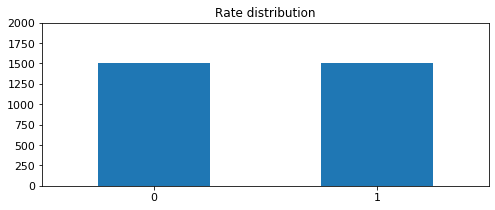

In [34]:
print(X.label.value_counts())
X.label.value_counts().plot(kind = 'bar',
                                title = 'Rate distribution',
                                ylim = [0, 2000],
                                rot = 0, fontsize = 11, figsize = (8,3))

In [35]:
# exercise 7

0    511
1    489
Name: label, dtype: int64


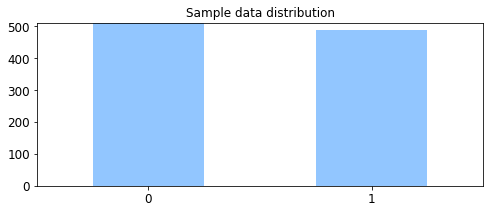

In [36]:
print(X_sample.label.value_counts())

# plot barchart for df_sample
plt.style.use('seaborn-pastel')
# set the max value of df_sample
X_sample_max = X_sample.label.value_counts().max()
# set ylim is df_sample_max
X_sample.label.value_counts().plot(kind = 'bar',
                                       title = 'Sample data distribution',
                                       ylim = [0, X_sample_max ],
                                       rot = 0, fontsize = 12, figsize = (8,3))

In [37]:
#exercise 8

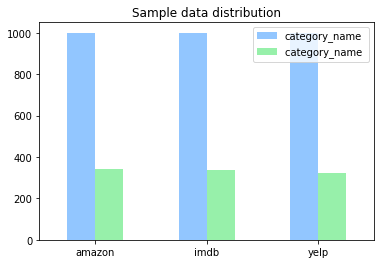

In [38]:
index = ['amazon', 'imdb', 'yelp']

compare_data = pd.DataFrame({'category_name': X.web.value_counts(),
                             'category_name ': X_sample.web.value_counts()
                            },index=index)
ax = compare_data.plot.bar(title = 'Sample data distribution',rot=0)

In [39]:
import nltk

In [40]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [41]:
X[0:4]

,index,web,text,label,unigrams
0,2930.0,yelp,"The food is about on par with Denny's, which i...",0,"[The, food, is, about, on, par, with, Denny, '..."
1,1572.0,imdb,Not recommended.,0,"[Not, recommended, .]"
2,929.0,amazon,As I said above....PRETTY USELESS!,0,"[As, I, said, above, ..., .PRETTY, USELESS, !]"
3,2365.0,yelp,"I find wasting food to be despicable, but this...",0,"[I, find, wasting, food, to, be, despicable, ,..."


In [42]:
list(X[0:1]['unigrams'])

[['The',
  'food',
  'is',
  'about',
  'on',
  'par',
  'with',
  'Denny',
  "'s",
  ',',
  'which',
  'is',
  'to',
  'say',
  ',',
  'not',
  'good',
  'at',
  'all',
  '.']]

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [44]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [45]:
#exercise 9

In [46]:
print(X['text'][0])
analyze(X['text'][0])

The food is about on par with Denny's, which is to say, not good at all.


['the',
 'food',
 'is',
 'about',
 'on',
 'par',
 'with',
 'denny',
 'which',
 'is',
 'to',
 'say',
 'not',
 'good',
 'at',
 'all']

In [47]:
X_counts.shape

(3000, 5155)

In [48]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [49]:
X[0:5]

,index,web,text,label,unigrams
0,2930.0,yelp,"The food is about on par with Denny's, which i...",0,"[The, food, is, about, on, par, with, Denny, '..."
1,1572.0,imdb,Not recommended.,0,"[Not, recommended, .]"
2,929.0,amazon,As I said above....PRETTY USELESS!,0,"[As, I, said, above, ..., .PRETTY, USELESS, !]"
3,2365.0,yelp,"I find wasting food to be despicable, but this...",0,"[I, find, wasting, food, to, be, despicable, ,..."
4,1596.0,imdb,The characters were all funny and had the pecu...,1,"[The, characters, were, all, funny, and, had, ..."


In [50]:
X_counts[0:5][:].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
#exercise 10

In [52]:
plot_x = ['term_' + str(i) for i in count_vect.get_feature_names()[0:50]]
plot_y = ['doc_' + str(i) for i in list(X.index)[0:50]]
plot_z = X_counts[25:75, 25:75].toarray()  # Because 0:50 didn't find 1, I change to 25:75

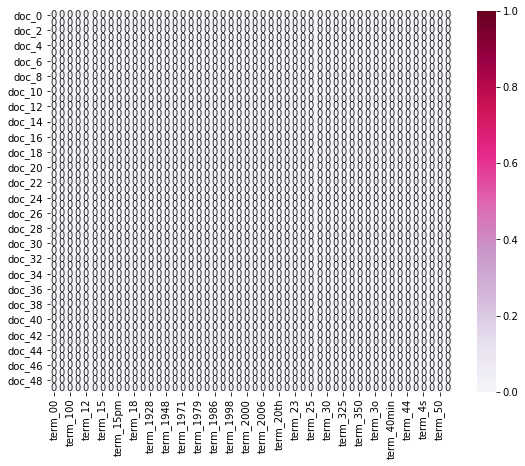

In [53]:
import seaborn as sns

X_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(X_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [54]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

X_reduced.shape

(3000, 2)

No handles with labels found to put in legend.


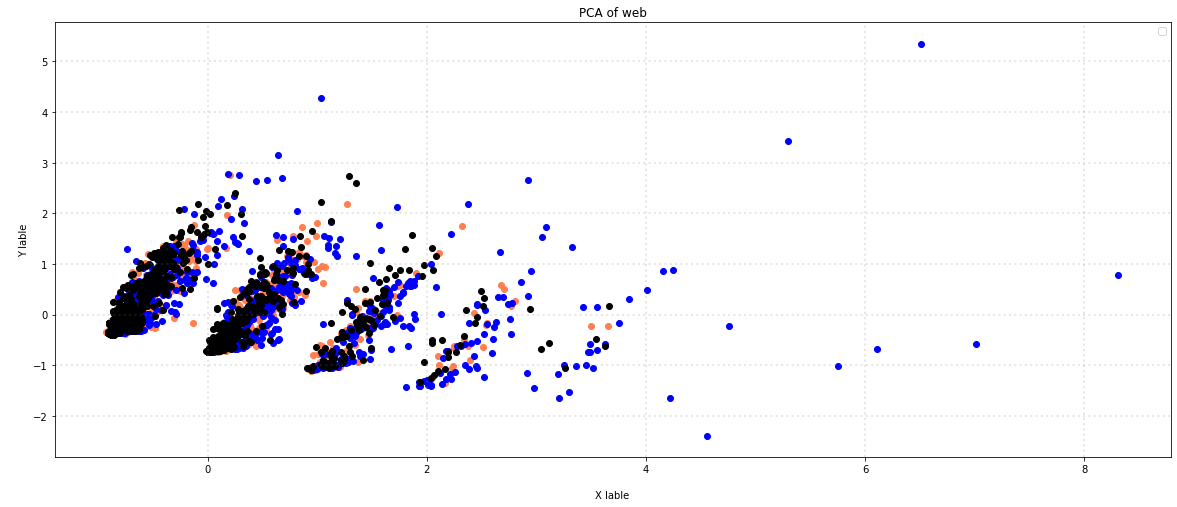

In [55]:
# colorful of points
col = ['coral', 'blue', 'black', 'm']
categories = X.web.unique()

# plot
fig = plt.figure(figsize = (20,8))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['web'] == category].T[0]
    ys = X_reduced[X['web'] == category].T[1]
    
    ax.scatter(xs, ys, c = c, marker = 'o',)
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX lable')
ax.set_ylabel('\nY lable')
ax.set_title('PCA of web')
ax.legend()
plt.show()

In [56]:
#exercise 12

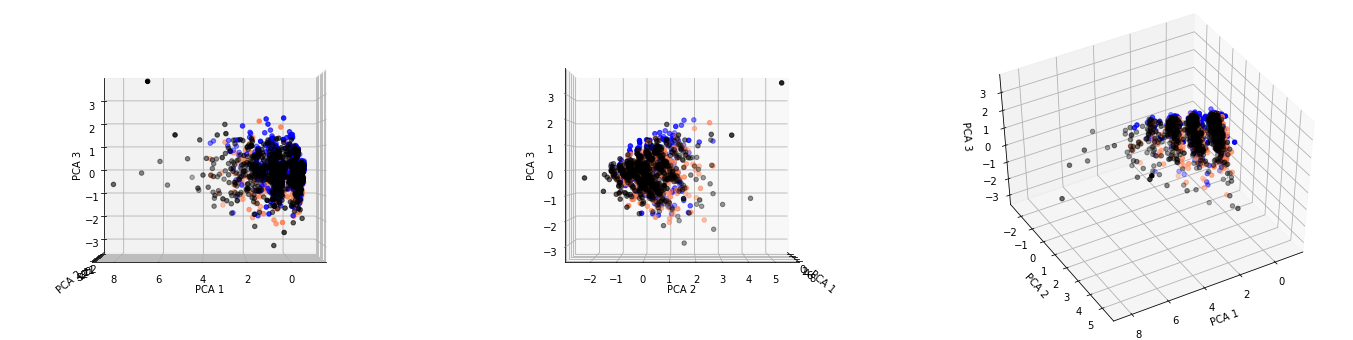

In [57]:
# 3d
X_reduced3d = PCA(n_components = 3).fit_transform(X_counts.toarray())

from mpl_toolkits import mplot3d

col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize=(24,6))

ax = fig.add_subplot(1, 3, 1, projection='3d')

for c, category in zip(col, ['amazon', 'yelp', 'imdb']):
    xs = X_reduced3d[X['web'] == category].T[0]
    ys = X_reduced3d[X['web'] == category].T[1]
    zs = X_reduced3d[X['web'] == category].T[2]
    ax.scatter(xs, ys, zs,c = c, marker='o')

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')    
ax.view_init(0, 90)


ax = fig.add_subplot(1, 3, 2, projection='3d')


for c, category in zip(col, ['amazon', 'yelp', 'imdb']):
    xs = X_reduced3d[X['web'] == category].T[0]
    ys = X_reduced3d[X['web'] == category].T[1]
    zs = X_reduced3d[X['web'] == category].T[2]
    ax.scatter(xs, ys, zs,c = c, marker='o')
    
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3') 
ax.view_init(0, 0)
    
    
ax = fig.add_subplot(1, 3, 3, projection='3d')


for c, category in zip(col, ['amazon', 'yelp', 'imdb']):
    xs = X_reduced3d[X['web'] == category].T[0]
    ys = X_reduced3d[X['web'] == category].T[1]
    zs = X_reduced3d[X['web'] == category].T[2]
    ax.scatter(xs, ys, zs,c = c, marker='o')
    
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3') 
ax.view_init(45, 60)



In [58]:
import numpy as np
term_frequencies = []

for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

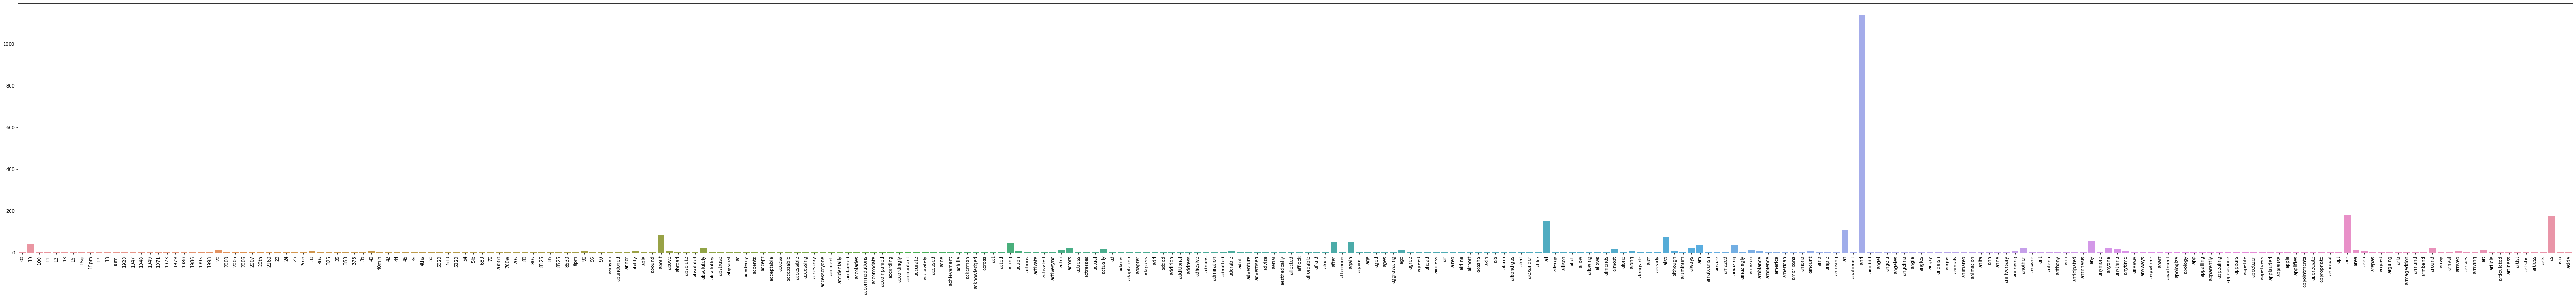

In [59]:
plt.subplots(figsize=(100, 10))

g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])

g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [60]:
#exercise 13

In [61]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
import plotly.graph_objs as go
fig = go.Figure(
    data=[go.Bar(y=term_frequencies[0:100])],
    
)

In [62]:
#exercise 14

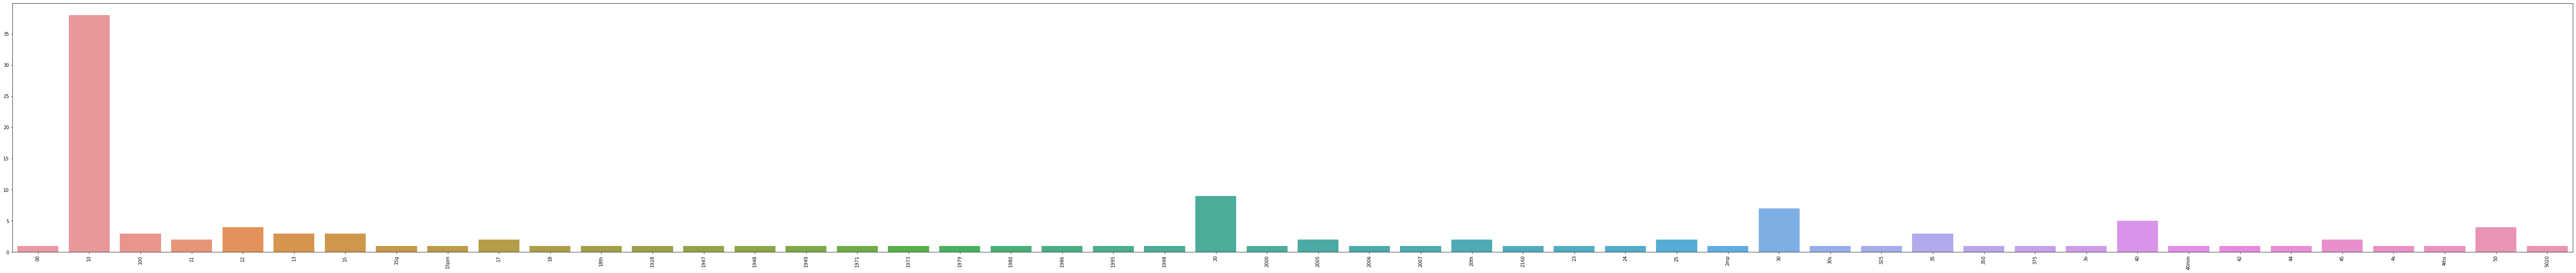

In [63]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:50], 
            y=term_frequencies[:50])
g.set_xticklabels(count_vect.get_feature_names()[:50], rotation = 90);

In [64]:
#exercise 15

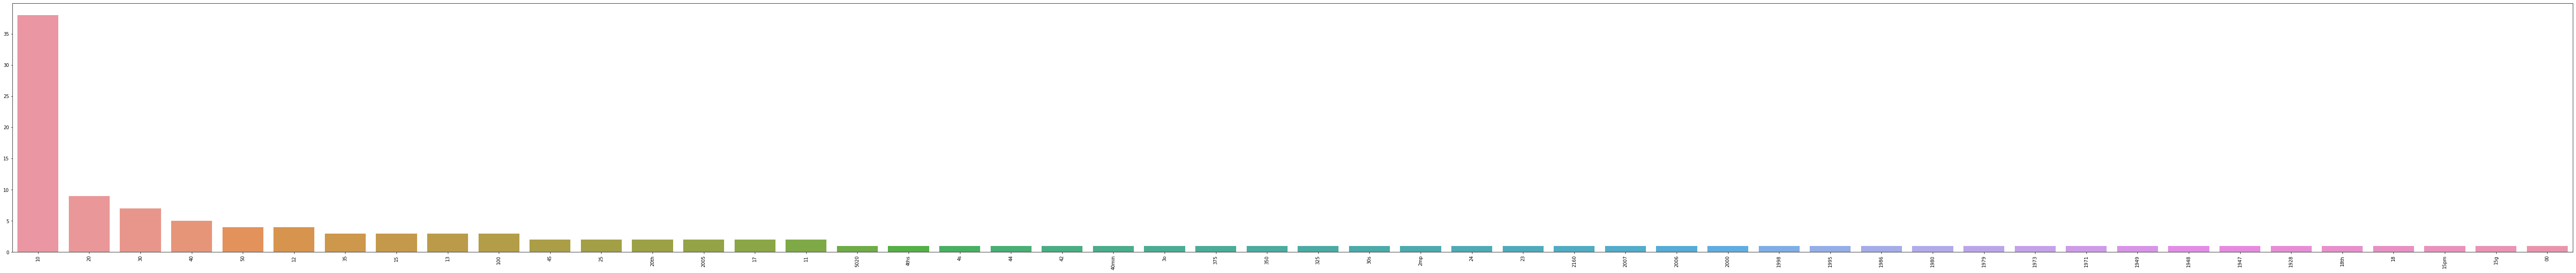

In [65]:
plt.subplots(figsize=(100, 10))
list1, list2 = (list(t) for t in zip(*sorted(zip(term_frequencies[:50], count_vect.get_feature_names()[:50]), reverse=True)))
g = sns.barplot(x=list2, y=list1)
g.set_xticklabels(list2, rotation = 90);

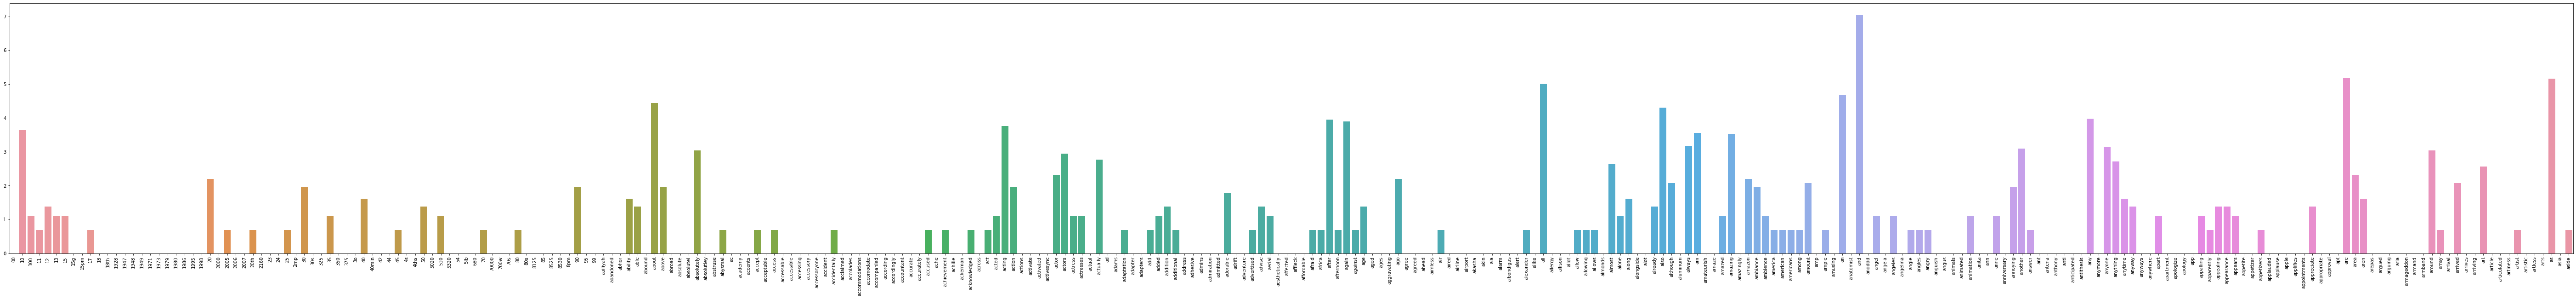

In [66]:
import math

term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [67]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [68]:
mlb = preprocessing.LabelBinarizer()

mlb.fit(X.web)

mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [69]:
X['bin_web'] = mlb.transform(X['web']).tolist()

X

,index,web,text,label,unigrams,bin_web
0,2930.0,yelp,"The food is about on par with Denny's, which i...",0,"[The, food, is, about, on, par, with, Denny, '...","[0, 0, 1]"
1,1572.0,imdb,Not recommended.,0,"[Not, recommended, .]","[0, 1, 0]"
2,929.0,amazon,As I said above....PRETTY USELESS!,0,"[As, I, said, above, ..., .PRETTY, USELESS, !]","[1, 0, 0]"
3,2365.0,yelp,"I find wasting food to be despicable, but this...",0,"[I, find, wasting, food, to, be, despicable, ,...","[0, 0, 1]"
4,1596.0,imdb,The characters were all funny and had the pecu...,1,"[The, characters, were, all, funny, and, had, ...","[0, 1, 0]"
...,...,...,...,...,...,...
2995,1451.0,imdb,"Not frightening in the least, and barely compr...",0,"[Not, frightening, in, the, least, ,, and, bar...","[0, 1, 0]"
2996,885.0,amazon,"When it opens, the battery connection is broke...",0,"[When, it, opens, ,, the, battery, connection,...","[1, 0, 0]"
2997,771.0,amazon,"VERY cheap plastic, creaks like an old wooden ...",0,"[VERY, cheap, plastic, ,, creaks, like, an, ol...","[1, 0, 0]"
2998,1375.0,imdb,"Elias Koteas,Jack Palance play good roles Ange...",1,"[Elias, Koteas, ,, Jack, Palance, play, good, ...","[0, 1, 0]"


In [70]:
mlb.fit(X.label)
mlb.classes_

array(['0', '1'], dtype='<U1')

In [71]:
#exercise 16

In [72]:
mlb.fit(X.label)
mlb.classes_
X['bin_label'] = mlb.transform(X['label']).tolist()
X

,index,web,text,label,unigrams,bin_web,bin_label
0,2930.0,yelp,"The food is about on par with Denny's, which i...",0,"[The, food, is, about, on, par, with, Denny, '...","[0, 0, 1]",[0]
1,1572.0,imdb,Not recommended.,0,"[Not, recommended, .]","[0, 1, 0]",[0]
2,929.0,amazon,As I said above....PRETTY USELESS!,0,"[As, I, said, above, ..., .PRETTY, USELESS, !]","[1, 0, 0]",[0]
3,2365.0,yelp,"I find wasting food to be despicable, but this...",0,"[I, find, wasting, food, to, be, despicable, ,...","[0, 0, 1]",[0]
4,1596.0,imdb,The characters were all funny and had the pecu...,1,"[The, characters, were, all, funny, and, had, ...","[0, 1, 0]",[1]
...,...,...,...,...,...,...,...
2995,1451.0,imdb,"Not frightening in the least, and barely compr...",0,"[Not, frightening, in, the, least, ,, and, bar...","[0, 1, 0]",[0]
2996,885.0,amazon,"When it opens, the battery connection is broke...",0,"[When, it, opens, ,, the, battery, connection,...","[1, 0, 0]",[0]
2997,771.0,amazon,"VERY cheap plastic, creaks like an old wooden ...",0,"[VERY, cheap, plastic, ,, creaks, like, an, ol...","[1, 0, 0]",[0]
2998,1375.0,imdb,"Elias Koteas,Jack Palance play good roles Ange...",1,"[Elias, Koteas, ,, Jack, Palance, play, good, ...","[0, 1, 0]",[1]


In [73]:
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [74]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['The "explosion" of the Gas tanks at the end was just as awful.']
['Avoid at all costs.']
['This is not movie-making.']


In [75]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [76]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.114708
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


In [77]:
#Third Part

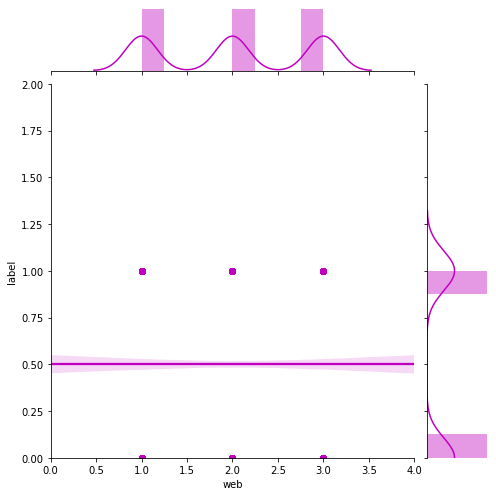

In [78]:
import seaborn as sns
categories = X.web.unique()
x_list = []
y_list = []
for i in range(3000):
    for j in range(3):
        if(X.bin_web[i][j] == 1):
            x_list.append(j+1)
    y_list.append(int(X.label[i]))
df_dict = {"web" : x_list, "label" : y_list}
data_LW = pd.DataFrame(df_dict)
g = sns.jointplot(x="web", y="label", data=data_LW, kind="reg", truncate=False, xlim=(0, 4), ylim=(0, 2), color="m", height=7)

In [79]:
#Since all three webs have same number of positive label and negative label, they have excatly the same graph.

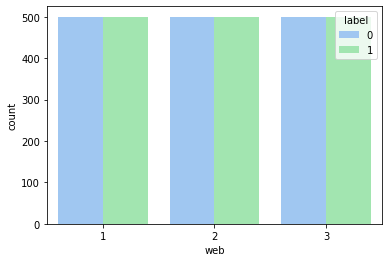

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x='web',hue='label',data=data_LW)

In [81]:
#TF-IDF features

In [82]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()  
tmp = vectorizer.fit_transform(X.text)
TFTDF_df = pd.DataFrame(tmp.toarray(),columns=vectorizer.get_feature_names(), index=X.index)
TFTDF_df

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
TFTDF_df['label'] = X.label
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
model = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(TFTDF_df.drop(columns=['label']), TFTDF_df.label, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
correct_count = 0
y_test = list(y_test)
for i in range(100):
    if(y_test[i] == y_pred[i]):
        correct_count += 1
print("TFIDF_method's accuracy: ",correct_count/100)

TFIDF_method's accuracy:  0.71


In [84]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
TF_df = pd.DataFrame(X_counts.toarray(),columns=vectorizer.get_feature_names())
TF_df['label'] = X.label
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
model = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(TF_df.drop(columns=['label']), TF_df.label, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
correct_count = 0
y_test = list(y_test)
for i in range(100):
    if(y_test[i] == y_pred[i]):
        correct_count += 1
print("TFIDF_method's accuracy: ",correct_count/100)

TFIDF_method's accuracy:  0.62


In [85]:
#Fourth

#In my opinion, in the lab1, there are lots of things that are necessary such as showing as how to utilise the package.(Because this is inevitable for teaching.)Although it need too much time, it can have student familiar package quickly.
#In addition, "categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']",
#this code can be written as "categories = X.category_name.unique()" which is more efficient.